# Exploração e análise de dados de crédito com SQL

O dataset utilizado neste projeto é uma amostra extraída do dataset **crédito**, disponibilizado no GitHub pelo Engenheiro de Dados André Marcos Perez. A tabela foi criada no **AWS Athena** utilizando o serviço de armazenamento **Amazon S3**.<br>
Para conferir os dados na íntegra, acesse o link:<br>
https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset. 

<font size="5">Sobre dos dados:</font><br>
<font size="3"> Os dados desta tabela retratam informações de clientes de um banco. Os dados estão dispostos em 13 colunas. Acerca das colunas e suas referências, temos:</font>

>**idade**: idade do cliente;<br>              
**sexo**: sexo do cliente (F/M);<br>                
**dependentes**: número de dependentes associados ao cliente;<br>          
**escolaridade**: nível de escolaridade do cliente;<br>       
**estado_civil**: estado civil do cliente;<br>       
**salario_anual**: faixa salarial do cliente considerando 12 meses;<br>      
**tipo_cartao**: tipo de cartão disponibilizado pelo banco ao cliente;<br>     
**qtd_produtos_12m**: quantidade de produtos adquiridos com o cartão disponibilizado pelo banco, considerando os últimos 12 meses;<br>      
**interacoes_12m** quantidade transações realizadas com o cartão disponibilizado pelo banco, considerando os últimos 12 meses;<br>   
**meses_inativo_12m**: quantidade de meses em que não houve transações com o cartão disponibilizado pelo banco, considerando os últimos 12 meses;<br>   
**limite_credito**: valor do limite de crédito do cartão disponibilizado pelo banco;<br>    
**valor_transacoes_12m**: valor das transações realizadas com o cartão disponibilizado pelo banco, considerando os últimos 12 meses;<br><br>
**qtd_transacoes_12m**: quantidade de transações realizadas com o cartão disponibilizado pelo banco, considerando os últimos 12 meses.<br>  



<font size="5">Exploração dos Dados:</font><br>
<font size="4"> Para iniciar a etapa de exploração dos dados, vamos analisar o nosso dataset:</font><br><br>

>**1) Com que quantidade de dados iremos trabalhar, isto é, quantas informações temos em nosso dataset?**<br><br>
Para obter esta resposta, usaremos a seguinte query:<br><br> 
<span style="color:crimson;"> *SELECT COUNT (*) AS quantidade_dados FROM credito;</span><br><br> 
Como retorno da query, temos: 2564. <br><br>
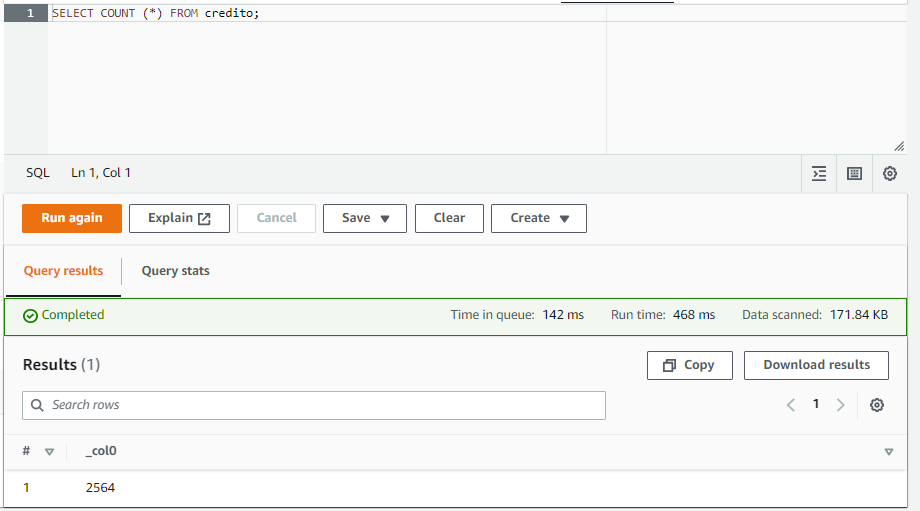<br><br>

>**2) Como os dados estão dispostos na tabela?**<br><br>
Para obter esta resposta, usaremos a seguinte query:<br><br>  
<span style="color:crimson;"> *SELECT * FROM credito LIMIT 10;*</span><br><br>
Note que, por se tratar um número elevado de dados, a consulta foi limitada à 10 linhas para melhor visualização. O resultado da query, no entanto, pode ser exportado em formato .csv, viabilizando a visualização e manipulação de todos os dados no console.<br><br>
Como retorno da query, temos: <br><br>
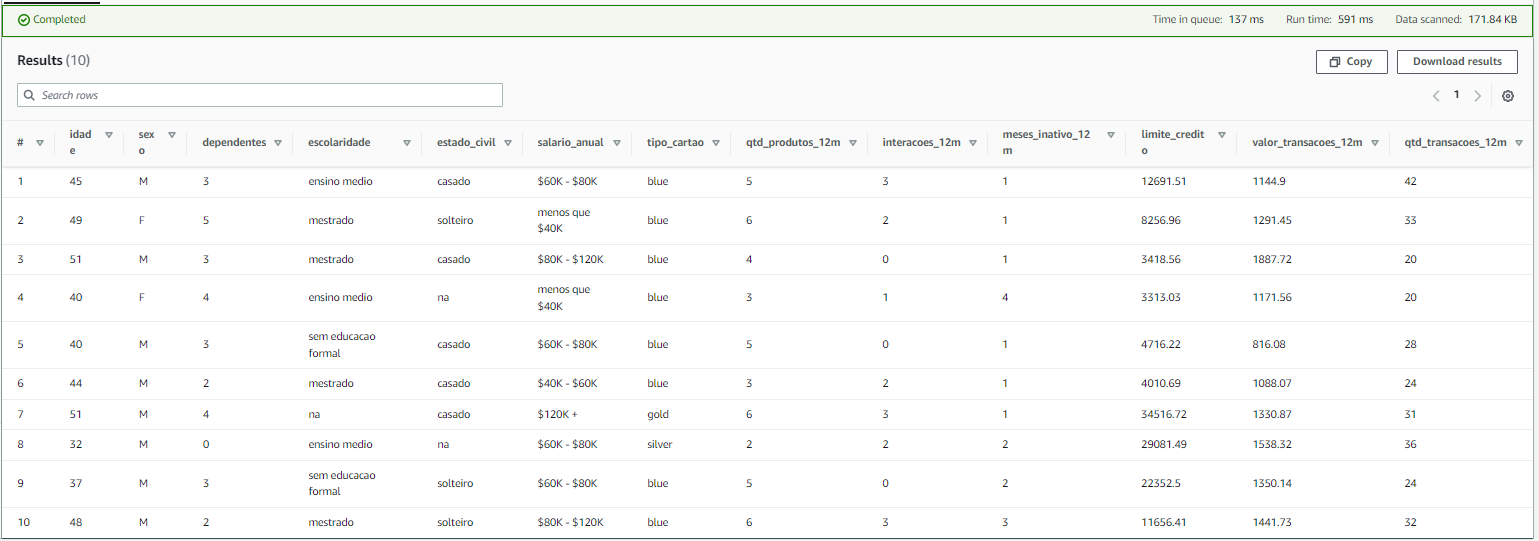<br><br>

>**3)Em relação à estrutura da tabela, quais foram os datatypes utilizados para "receber" cada dado?**<br><br>
Para obter esta resposta, usaremos a seguinte query:<br><br>  
<span style="color:crimson;"> *DESCRIBE credito;*</span><br><br>
Veja o retorno da query abaixo. Note que a coluna "SALARIO_ANUAL" recebe dados do tipo string. Isso ocorre pois nesta tabela estamos utilizando faixas salariais. Ex: "80 a 120 mil"<br><br>
idade <span style="color:crimson;"> int</span><br>                                 
sexo <span style="color:crimson;"> string</span><br>                              
dependentes <span style="color:crimson;"> int</span><br>                      
escolaridade <span style="color:crimson;"> string</span><br>                  
estado_civil <span style="color:crimson;"> string</span><br>                   
salario_anual <span style="color:crimson;"> string</span><br>                   
tipo_cartao <span style="color:crimson;"> string</span><br>               
qtd_produtos_12m <span style="color:crimson;"> bigint</span><br>                   
interacoes_12m <span style="color:crimson;"> bigint</span><br>                   
meses_inativo_12m <span style="color:crimson;"> int</span><br>                     
limite_credito <span style="color:crimson;"> double</span><br>                  
valor_transacoes_12m <span style="color:crimson;"> double</span><br>               
qtd_transacoes_12m <span style="color:crimson;"> bigint</span> 
<br><br>
>**4)Agora que já conhecemos melhor a estrutura do nosso dataset, podemos segregar e trabalhar melhor com os registros de cada coluna. Se quisermos visualizar, por exemplo, uma listagem de idades dos clientes *excluindo valores repetidos*, bastaria utilizar a query abaixo:**<br><br>
<span style="color:crimson;"> *SELECT DISTINCT (idade) FROM credito LIMIT 10;*</span><br><br>
Um ponto de atenção é que, neste caso, estamos desconsiderando o número de respostas. O foco é somente as idades informadas que não se repetem na tabela. Novamente, a consulta foi limitada a 10 linhas para melhor visualização dos dados. <br><br>
Podemos fazer a mesma consulta com dados não numéricos. Por exemplo, vamos visualizar a listagem de escolaridade dos clientes excluindo os valores repetidos. A query utilizada será a mesma, trocaremos apenas o nome da coluna e desconsideraremos dados registrados como "NA":<br><br>
<span style="color:crimson;"> *SELECT DISTINCT (escolaridade) <br> FROM credito <br>
WHERE escolaridade != 'na';*</span><br><br>
Com o retorno da query, vemos a lista de escolaridade dos clientes do banco:<br><br>
graduacao<br>
doutorado<br>
sem educacao formal<br>
ensino medio<br>
mestrado<br>


<font size="5">Análise dos Dados:</font><br>
<font size="4"> Para iniciar a etapa de análise dos dados, vamos responder a alguns questionamentos que nos ajudarão a conhecer os produtos oferecidos pelo banco e o perfil dos clientes:</font><br><br>



>**1) Vamos verificar os tipos de cartão oferecidos pelo banco aos clientes da tabela e a média de limite de crédito, por tipo de cartão:**<br><br>
Para obter esta resposta, usaremos a seguinte query:<br><br> 
<span style="color:crimson;"> SELECT AVG(limite_credito) AS media_limite_por_cartao, tipo_cartao
FROM credito<br>
GROUP BY tipo_cartao;</span><br><br> 
Com o retorno da query, podemos observar que o banco trabalha minimamente com quatro tipos de cartão: blue, silver, gold e platinum. Em relação à distribuição de limite por tipo de cartão, podemos inferir que, em média, os menores limites são disponibilizados para os cartões blue, enquanto os maiores limites são disponibilizados para cartões os platinum:<br><br>
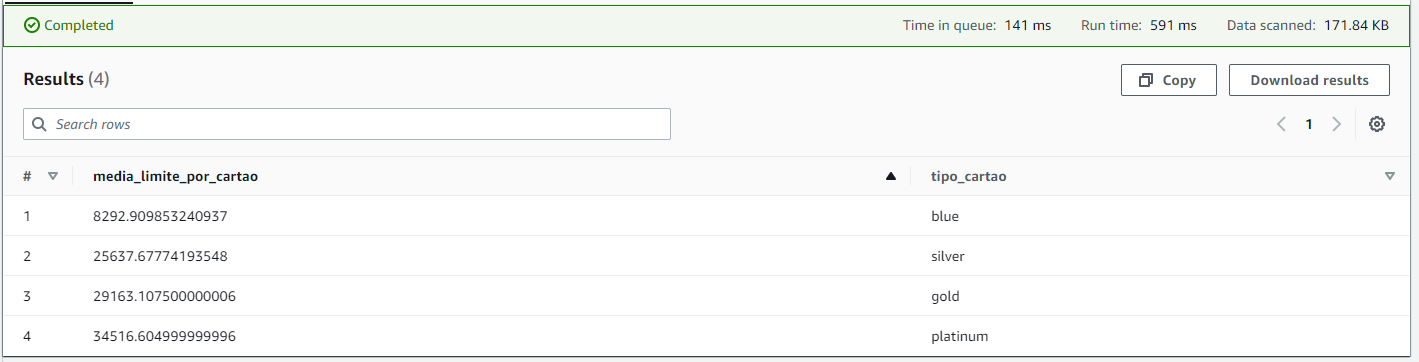<br><br> 

>**2) Vamos analisar agora alguns aspectos dos clientes do banco. Podemos começar identificando quantos clientes são do sexo feminino e quantos são do sexo masculino:**<br><br>
Para obter esta resposta, usaremos a seguinte query:<br><br> 
<span style="color:crimson;"> SELECT COUNT (sexo) AS quantidade, sexo 
FROM credito<br>
GROUP BY sexo;</span><br><br> 
Como retorno da query temos que, dos 2564 clientes que o banco possui, 1001 são do sexo feminino e 1563 são do sexo masculino. Isso quer dizer que a maioria dos clientes do banco é do sexo masculino, representando 61% total analisado.<br><br>
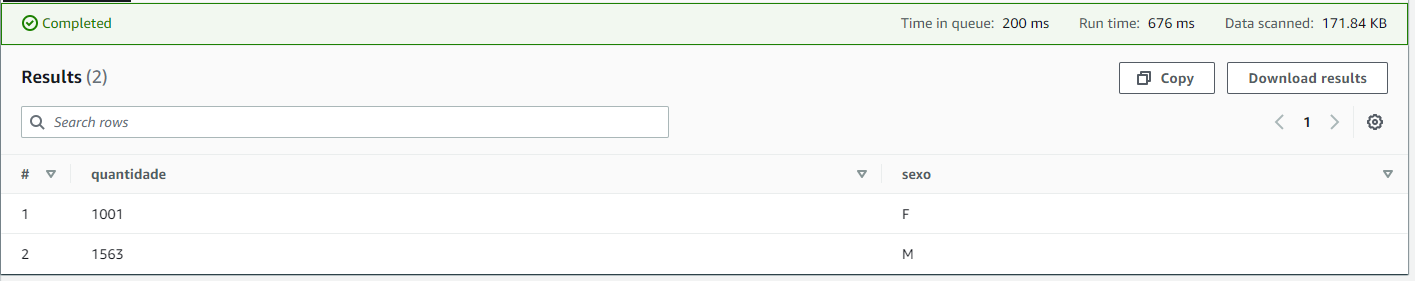<br><br>

>**3) Podemos identificar também a idade média dos clientes do banco, considerando clientes do sexo feminino e masculino. Vamos considerar duas casas decimais:**<br><br>
Para obter esta resposta, usaremos a seguinte query:<br><br> 
<span style="color:crimson;"> SELECT AVG(idade) AS media_idade, sexo FROM credito <br>
GROUP BY sexo;</span><br><br> 
Como retorno da query temos que a idade média dos clientes do sexo femino é 46.42, enquanto a idade média dos clientes do sexo masculino é 45.57, ou seja, as clientes do sexo feminino, em média, são ligeiramente mais velhas em relação aos clientes do sexo masculino. <br><br>

>**4) Agora, vamos analisar a quantidade de clientes por escolaridade, desconsiderando registros que contenham "NA":**<br><br>
Para obter esta resposta, usaremos a seguinte query:<br><br> 
<span style="color:crimson;"> SELECT escolaridade, COUNT (escolaridade) AS distribuicao FROM credito <br>
WHERE escolaridade != 'na'<br>
GROUP BY escolaridade;</span><br><br> 
Como retorno da query, podemos perceber que o grau de escolaridade mestrado possui o maior número de clientes, se comparado aos demais graus de escolaridade. Para melhorar a visualização, vamos analisar estes dados em um gráfico:<br><br>
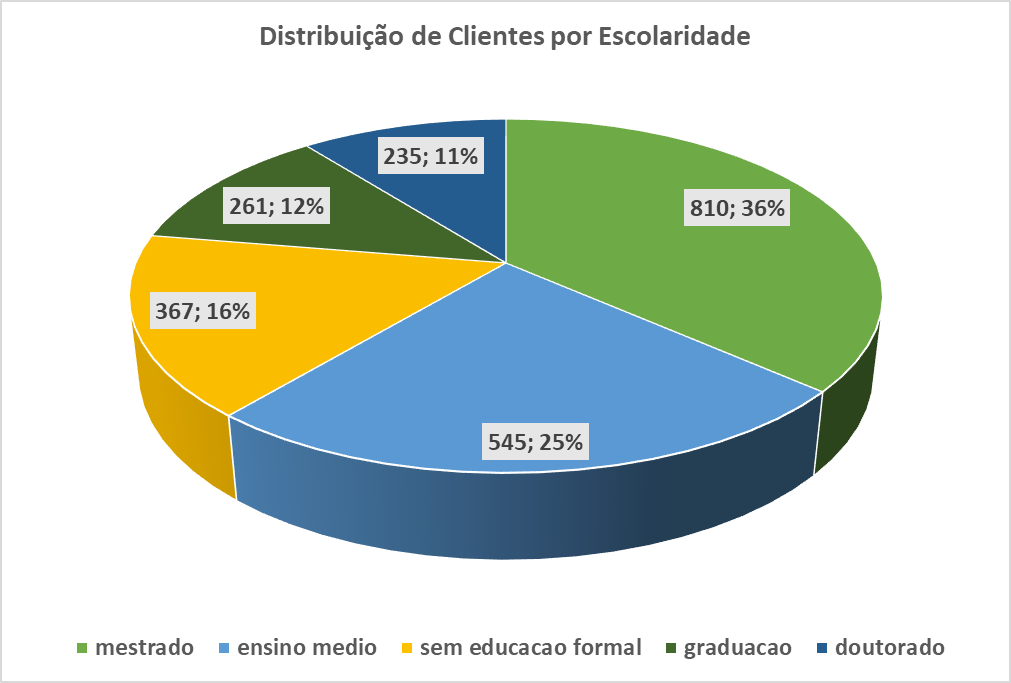<br><br>

>**5) Podemos agora analisar o grau de escolaridade dos clientes do banco por sexo, desconsiderando registros que contenham "NA":**<br><br>
Para obter esta resposta, usaremos duas queries, uma para o sexo feminino e outra para o sexo masculino. <br> 
Vamos analisar primeiro a distribuição do grau de escolaridade para clientes do sexo feminino usando a seguinte query:<br><br> 
<span style="color:crimson;"> SELECT COUNT (sexo) AS quantidade, sexo, escolaridade FROM credito<br>
WHERE sexo = 'F' AND escolaridade != 'na'<br>
GROUP BY sexo, escolaridade;</span><br><br> 
Como retorno da query, temos:<br><br>
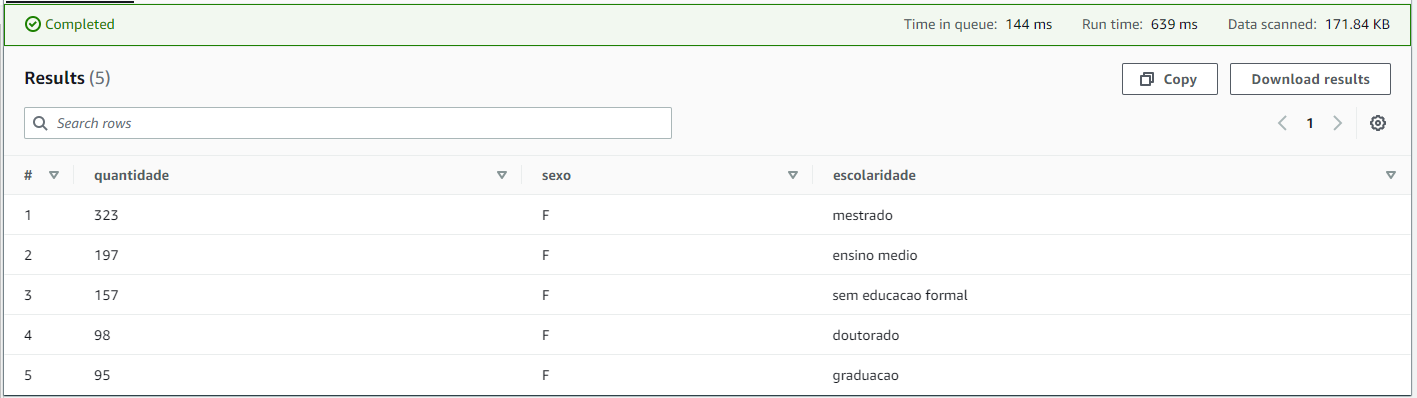<br><br>
Agora, vamos analisar a distribuição do grau de escolaridade para clientes do sexo masculino usando a seguinte query:<br><br>
<span style="color:crimson;"> SELECT COUNT (sexo) AS quantidade, sexo, escolaridade FROM credito<br>
WHERE sexo = 'M' AND escolaridade != 'na'<br>
GROUP BY sexo, escolaridade;</span><br><br> 
Como retorno da query, temos:<br><br>
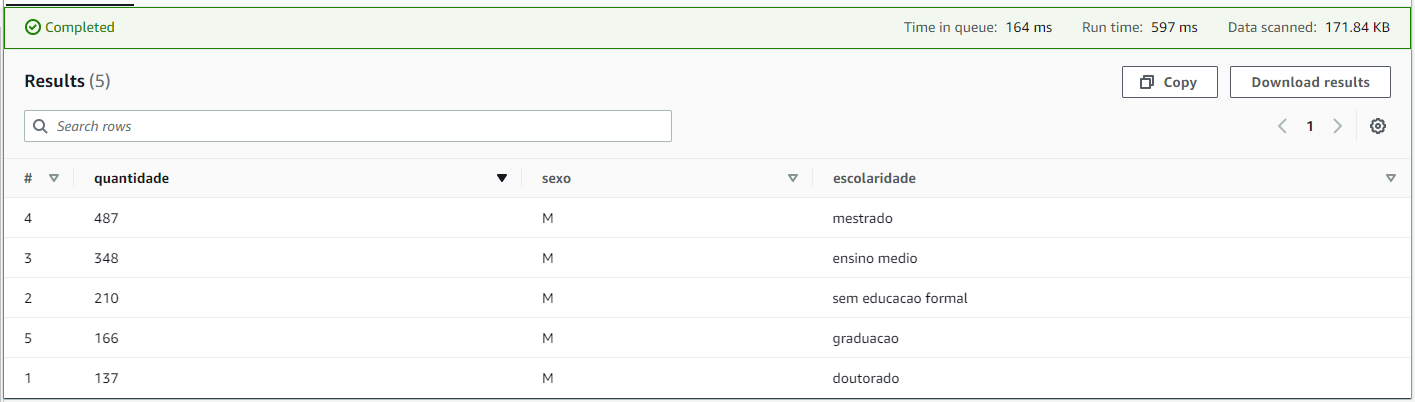<br><br>
A partir do retorno das queries acima, podemos dizer que, no geral, o grau de escolaridade encontra-se equivalente entre os clientes, considerando que temos mais clientes do sexo masculino do que clientes do sexo feminino. A diferença encontra-se no grau de "DOUTORADO". Nesta categoria, temos mais clientes do sexo feminino.<br><br>

>**6) Vamos analisar agora a distribuição de clientes do banco por faixa salarial, desconsiderando registros que contenham "NA":**<br><br>
Para obter esta resposta, usaremos a seguinte query:<br><br> 
<span style="color:crimson;"> SELECT salario_anual, COUNT (*) AS distribuicao
FROM credito<br>
WHERE salario_anual != 'na'<br> 
GROUP BY salario_anual;</span><br><br> 
Como retorno da query, podemos perceber que o maior número de clientes recebe anualmente menos que 40 mil.<br><br>
menos que 40K - 701<br>
entre 80K e 120K - 488<br>
entre 40K e 60K - 467<br>
entre 60K e 80K - 451<br>
mais que 120K - 222<br><br>

>**7) Vamos coletar uma amostra de 15 registros e analisar o perfil dos clientes do banco, relacionando a escolaridade ao salario anual. Nesta consulta também vamos desconsiderar registros que contenham "NA":**<br><br>
Para obter esta resposta, usaremos a seguinte query:<br><br> 
<span style="color:crimson;"> SELECT escolaridade, salario_anual FROM credito<br> 
WHERE escolaridade != 'na' AND salario_anual != 'na'<br>
GROUP BY salario_anual, escolaridade<br>
LIMIT 15</span><br><br> 
Como retorno da query, podemos perceber que, nesta amostra, a escolaridade dos clientes está bem distribuida e não influencia tanto no salario anual:<br><br>
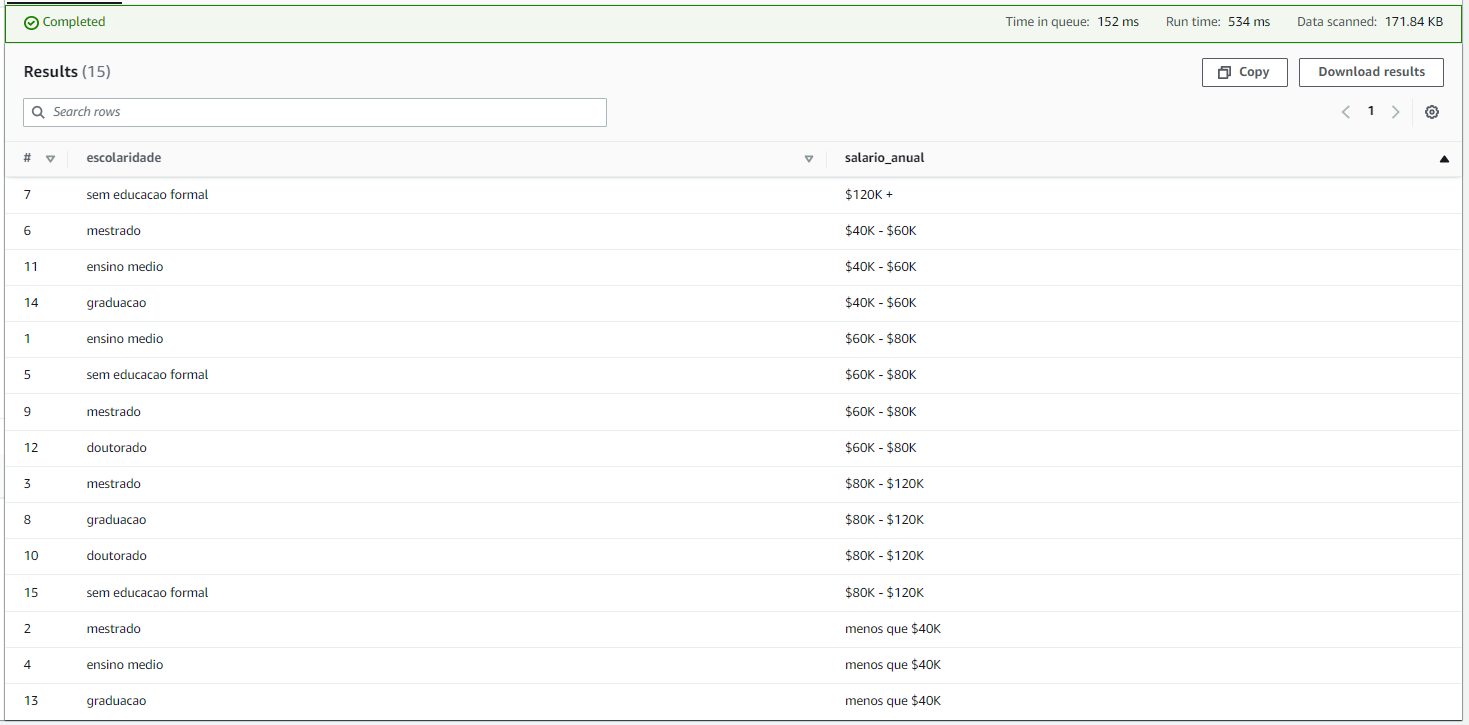

>**8) Vamos agora analisar agora o perfil dos clientes que possuem os maiores limites de crédito, desconsiderando registros que contenham "NA", limitando a consulta a 15 linhas para melhor visualização:**<br><br>
Para obter esta resposta, usaremos a seguinte query:<br><br> 
<span style="color:crimson;"> SELECT MAX (limite_credito) AS limite_credito, escolaridade, tipo_cartao, salario_anual, sexo 
FROM credito <br>
WHERE escolaridade != 'na' AND salario_anual != 'na'<br>
GROUP BY escolaridade, tipo_cartao, salario_anual, sexo <br>
ORDER BY limite_credito DESC<br> 
LIMIT 15;</span><br><br> 
Com o retorno da query realizada nesta amostra, vemos que a escolaridade não influencia no limite de crédito (o que conversa com o resultado que obtivemos no tópico 7). Vemos também que o maior limite de crédito não pertence ao cliente com o maior salário anual e que os 15 maiores limites de crédito pertencem à clientes do sexo masculino. Além disso, os maiores limites pertencem a clientes com faixa salarial entre 80 e 120 mil ao ano. <br><br>
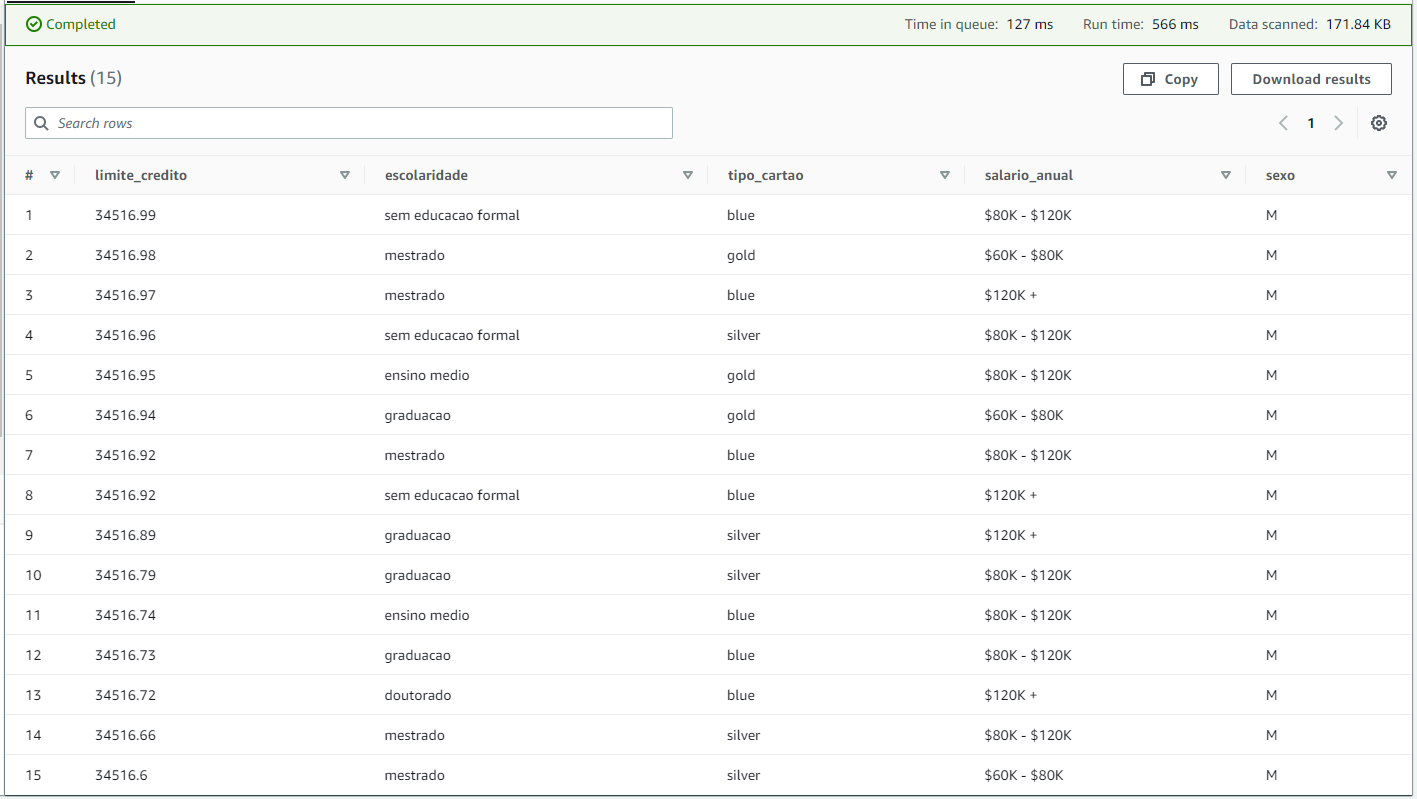<br><br> 

>**9) Vamos analisar agora o perfil dos clientes que possuem os menores limites de crédito, desconsiderando registros que contenham "NA", limitando a consulta a 15 linhas para melhor visualização:**<br><br>
Para obter esta resposta, usaremos a seguinte query:<br><br> 
<span style="color:crimson;"> SELECT MIN (limite_credito) AS limite_credito, escolaridade, tipo_cartao, salario_anual, sexo 
FROM credito <br>
WHERE escolaridade != 'na' AND salario_anual != 'na'<br>
GROUP BY escolaridade, tipo_cartao, salario_anual, sexo <br>
ORDER BY limite_credito DESC<br> 
LIMIT 15;</span><br><br> 
Com o retorno da query, vemos mais uma vez que a escolaridade não influencia no limite de crédito e que os 15 menores limites de crédito pertencem à clientes do sexo masculino. Além disso, percemos uma mudança na faixa salarial entre os 15 menores limites. Nesta consulta, contamos com registros de clientes que ganham menos de 40 mil ao ano. <br><br>
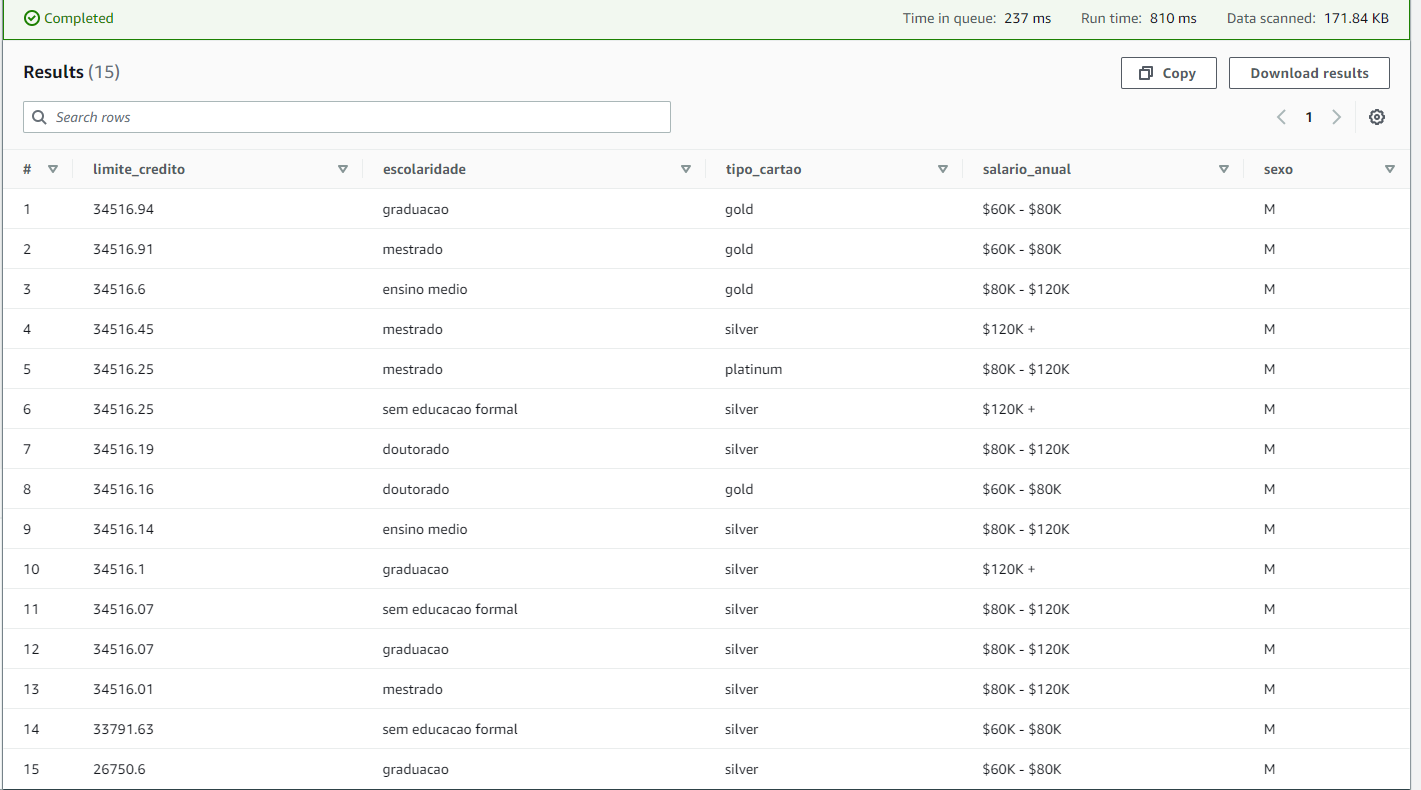<br><br> 

>**10) Vamos analisar agora a aderência dos cartões e limites ofertados pelo banco aos 15 clientes com maior salario anual,desconsiderando registros que contenham "NA", limitando a consulta a 15 linhas para melhor visualização:**<br><br>
Para obter esta resposta, usaremos a seguinte query:<br><br> 
<span style="color:crimson;"> SELECT MAX (limite_credito) AS limite_credito, escolaridade, tipo_cartao, salario_anual, sexo 
FROM credito <br>
WHERE escolaridade != 'na' AND salario_anual != 'na'<br>
GROUP BY escolaridade, tipo_cartao, salario_anual, sexo <br>
ORDER BY limite_credito DESC<br> 
LIMIT 15;</span><br><br> 
Com o retorno da query realizada nesta amostra, podemos obeservar que, dos 15 clientes que possuem o maior salário anual, 93,33% possuem cartão blue, o tipo de cartão que, em média, oferece limites mais baixos, como vimos na consulta do tópico 1. Isso nos leva a questionar o porque do banco não ter oferecido ainda um cartão com mais benefícios e maiores limites para estes clientes. <br><br>
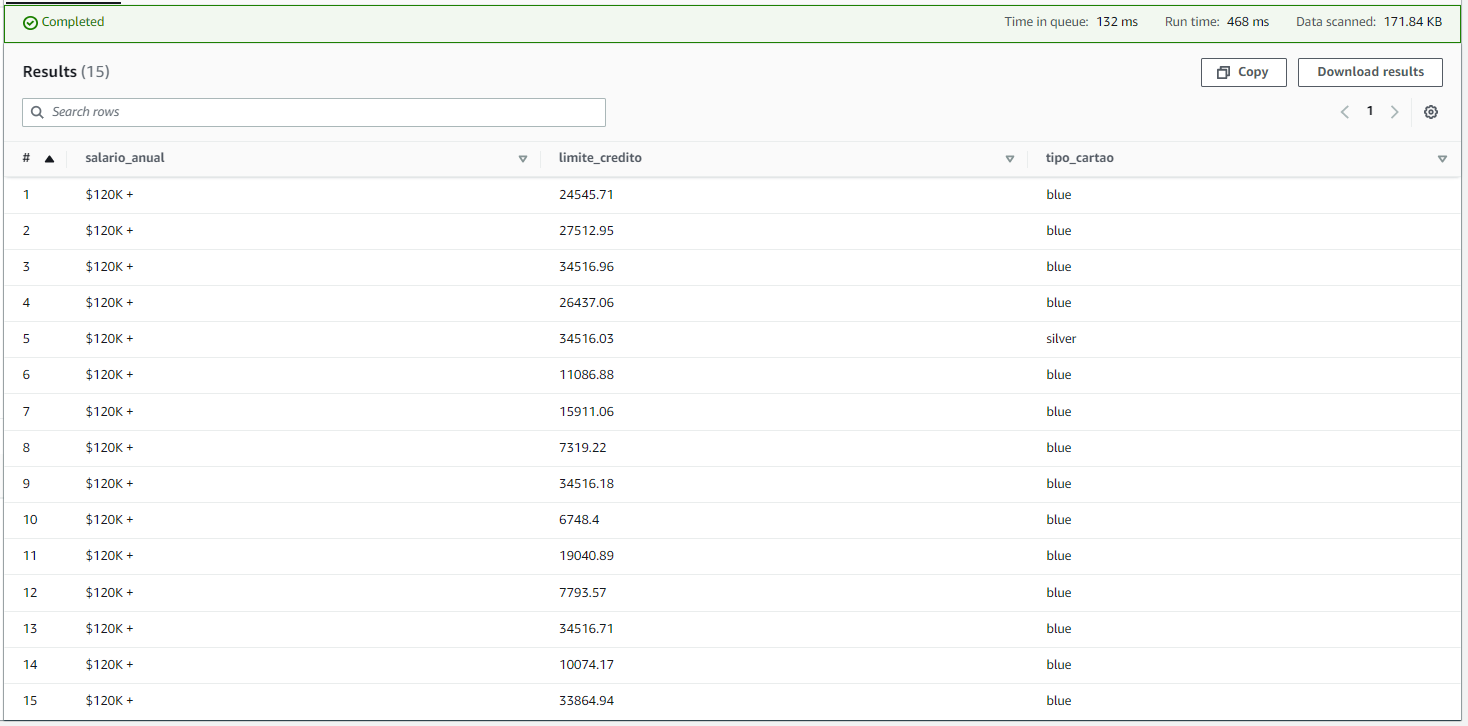<br><br> 
Será que os clientes coletados na amostra possuem um número baixo de transações com o cartão? Vamos analisar isso na próxima consulta.  

>**11) Vamos analisar agora a quantidade de interações, isto é, transações, realizadas pela mesma amostra de clientes analisada na consulta acima. Com isso, podemos avaliar se a quantidade de interações pode ter relação com o fato destes 15 clientes terem o cartão mais básico do banco (de acordo com os dados do dataset), mesmo possuindo os maiores salários anuais. Novamente, vamos desconsiderar registros que contenham "NA" e limitar a consulta a 15 linhas para melhor visualização:**<br><br>
Neste caso, usaremos duas queries. Na primeira, iremos verificar a média geral de interações dos clientes em 12 meses:<br><br> 
<span style="color:crimson;">SELECT AVG(qtd_transacoes_12m) AS media_qtd_transacoes_12m<br>
FROM credito;</span><br><br> 
Como retorno da query, considerando duas casas decimais, temos como resposta: 41.70<br><br> 
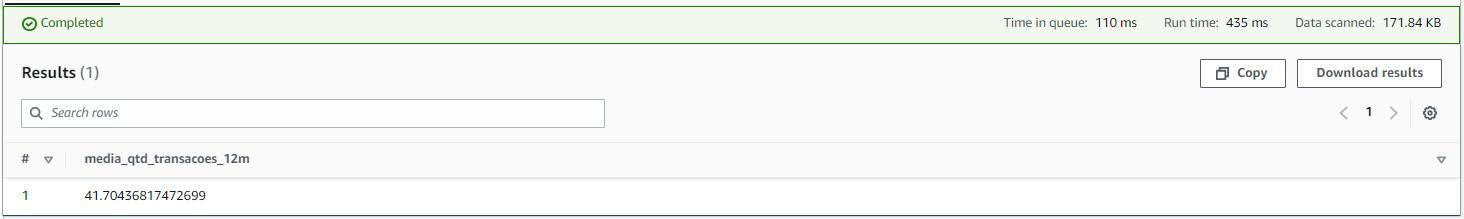<br><br> 
Nesta segunda query, vamos comparar a média geral de interações dos clientes, em 12 meses, com os 15 clientes que possuem os maiores salários anuais e contam com o cartão blue. Usaremos a query abaixo:<br><br> 
<span style="color:crimson;">SELECT salario_anual, limite_credito, tipo_cartao, qtd_transacoes_12m FROM credito <br>
WHERE salario_anual != 'na'<br>
GROUP BY salario_anual, limite_credito, tipo_cartao, qtd_transacoes_12m<br>
ORDER BY salario_anual ASC<br>
LIMIT 15;</span><br><br> 
Como retorno da query, vemos que  a maioria dos clientes deste perfil apresenta um número de interações menor que a média, considerando 12 meses. Podemos considerar, portanto, que o baixo número de interações, em relação à média geral, justifica o fato de 93,33% dos 15 clientes com maior salário terem o cartão blue.<br><br>  
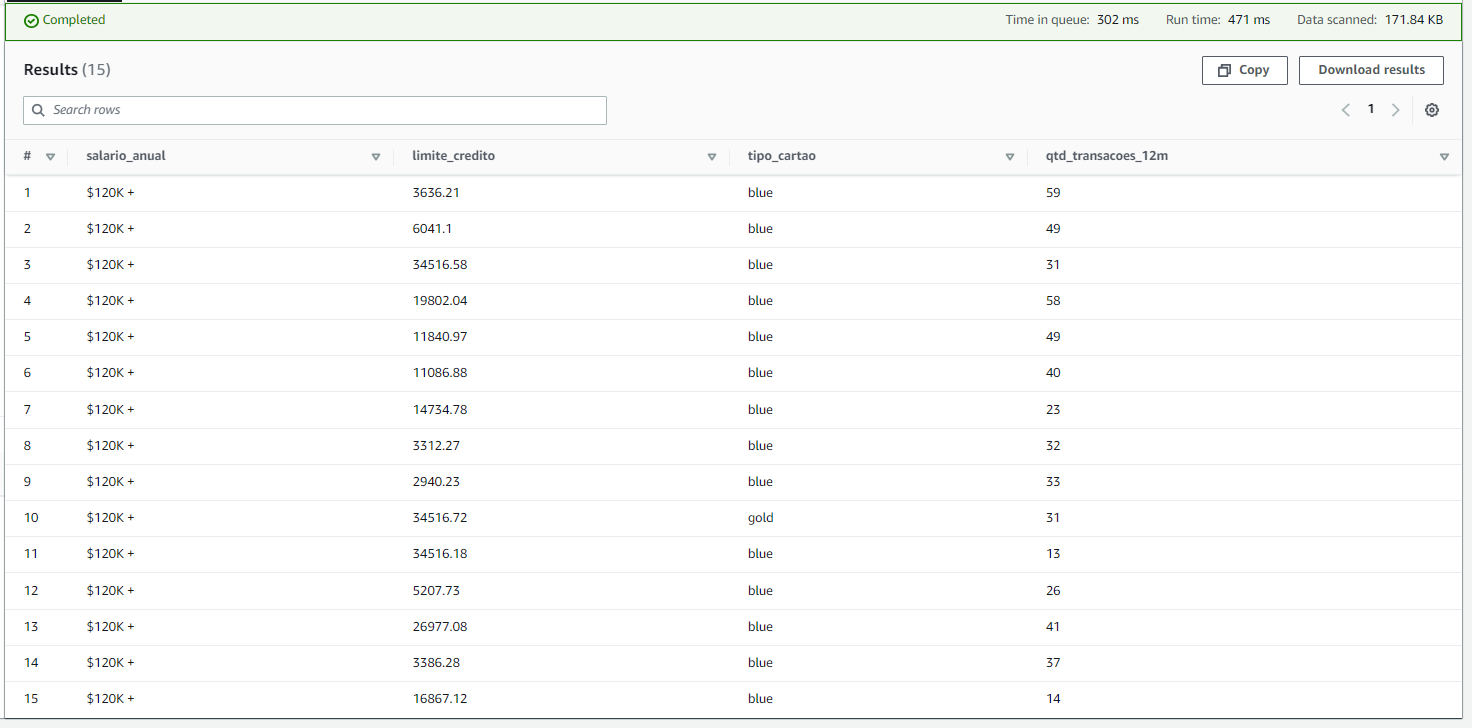<br><br>


<font size="5">Conclusão:</font><br>
<font size="3"> A partir exploração dos dados e das análises realizadas, podemos inferir que:



>O banco trabalha minimamente com 4 cartões: blue, silver, gold e platinum;<br>
Em média, os maiores limites são disponibilizados no cartão do tipo platinum e, os menores, no blue;<br>
A maior parte dos clientes do banco é do sexo masculino;<br>
A maior parte dos clientes possui renda até 40 mil;<br>
A escolaridade parece não influenciar no salário anual dos clientes;<br>
A escolaridade parece não influenciar no limite de crédito oferecido aos clientes;<br>
Dentre os 15 clientes com maior salário, 93,33% possuem o cartão do tipo blue (o mesmo tipo que, em média, oferece os menores limites de crédito). Desta amostra de clientes, a maioria possui um número **menor** de interações/transações com o cartão do banco, se comparado com a média de interações geral, considerando um período de 12 meses;<br>  
Uma exploração e análise com mais dados pode explicar os eventos acima. Um insight para o banco, talvez, fosse analisar a possibilidade de disponibilizar cartões com maiores benefícios aos clientes que possuem maior salário, além de promover ações que aumentem o número de interações com os cartões fornecidos. 